In [96]:
import pandas as pd
import plotly.express as px

from sklearn import neighbors
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

Using the Wine Quality dataset from Kaggle, https://www.kaggle.com/datasets/rajyellow46/wine-quality, we can perform the following.

In [2]:
df = pd.read_csv('WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


Dataset has 1143 entries with a unique ID. 

In [3]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

Dataset is composed of continuous variables.

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


* Data of different columns are all of different scales, will need to be normalized before performing any type of classification on it. 
* pH and density appear to have the lowest variance in values (based on standard dev and difference between mean and max)

In [43]:
fig = px.histogram(df, x='quality')
fig.update_layout(title='Histogram of Full Wine Quality Dataset',
                  bargap=0.2,
                  width=800,
                  height=600,
    )
fig.show()

Most of the observations are within the range 5-7, with no wine's being rated lower than 3.

In [44]:
subs_df = df[df['quality'].isin([5, 6, 7])]

fig = px.histogram(subs_df, x='quality')
fig.update_layout(title='Histogram of Wine Quality Subset',
                  bargap=0.2,
                  xaxis = dict(
                    tick0 = 5,
                    dtick = 1
                ),
                width=800,
                height=600,
    )
fig.show()

In [28]:
print('There are', subs_df.shape[0], 'observations in the subset')
print('There are', subs_df['quality'].nunique(), 'unique values in the quality subset')

There are 1088 observations in the subset
There are 3 unique values in the quality subset


In [49]:
no_qual_df = subs_df.drop(['quality'], axis=1)
fig = px.imshow(no_qual_df.corr())
fig.update_layout(title='Wine Data Correlation Heatmap',
                  width=800,
                  height=600,
                  )
fig.show()

* The highest positive correlation between two different variables is between density and fixed acidity (0.68). 
* The highest negative correlation between two different variables is fixed acidity and pH (-0.68).
* There is almost no correlation between voltaile acidity and residual sugar (-294 u)

In [59]:
subs_df.dropna(inplace=True)
print('There are', subs_df.shape[0], 'observations in the subset after the missing rows have been dropped, so all values are present')

There are 1088 observations in the subset after the missing rows have been dropped, so all values are present


C:\Users\melin\AppData\Local\Temp\ipykernel_3108\3632176697.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
# Assigning predictor and response variables
x = subs_df.drop(['quality'], axis=1)
y = subs_df['quality']

x = scale(x, axis=0)
# x

In [66]:
# Splitting into training/testing set, 75%/25%

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y, 
    test_size=0.25, 
    random_state=0, 
    stratify=y
    )

In [69]:
# Performing KNN classification, K=5

knn3 = neighbors.KNeighborsClassifier(
    n_neighbors = 5,
    algorithm='brute'
    )
# train the model
knn3.fit(x_train, y_train)

pred = knn3.predict(x_test)


In [71]:
# Q14: Finding accuracy of the model
print(round(metrics.accuracy_score(y_test, pred),2))

0.59


[[83 34  4]
 [40 61 14]
 [ 4 15 17]]


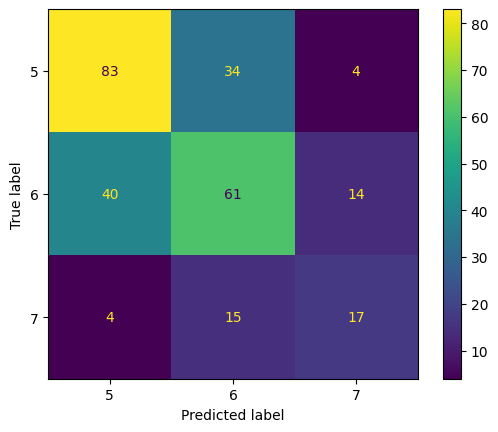

In [90]:
# Q15
cm = metrics.confusion_matrix(y_test, pred)
print(cm)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=['5', '6', '7'])
disp.plot()

Looking at the confusion matrix (and the easier to visualize ConfusionMatrixDisplay) we can interpret the rows as the true response variables, and the columns as the predicted response variables. So for example, looking at the diagonal we can see how many entries were predicted correctly. Looking in the top left shows that 83 entries were predicted as 5, and are actually 5. 

Looking at the entry in row 2 col 1, we can see that 40 entries that were predicted to be a quality of 5 are actually a quality of 6.

#### Q16
This matrix shows that the algorithm struggles to accurately predict entries with a quality = 7 and 6. We know this because of the 36 entries that are actually 7, only 17 were predicted correctly (47%). Likewise, only 53% of quality 6 wines were predicted correctly. Quality 5 wines have the highest accuracy, with a rate of 69%.

In [105]:
# Q18
k_range = range(1, 15)
score_acc = [] 

for k in k_range:

    knn = neighbors.KNeighborsClassifier(
    n_neighbors = k,
    algorithm='brute'
    )
    # train the model
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    acc = round(metrics.accuracy_score(y_test, y_pred),2)
    score_acc.append(acc)


In [109]:
fig = px.line(x=k_range, 
              y=score_acc, 
              labels={'x':'K', 'y':'Test Set Accuracy'})
fig.update_layout(height=600,
                  width=800,
                  title='Accuracy Score of KNN Models',
                  xaxis=dict(tickmode='array', 
                             tickvals=list(range(1, 15))
                             )
                 )
fig.show()

#### Q19
The best K value is 9. This maximizes the accuracy (61%) while minimizing the size of K.

#### Q20
Although K=9 leads to the best result, the accuracy is still not great. An accuracy of 61% leaves much room for improvement. This is likely because the predictor values are so varied. This makes it difficult for KNN to accurately predict quality using the predictors.

#### Q21
* Find the predictor variables with a high correlation to the quality (either positive or negative) and then use those variables to perform KNN.
* This data may be suffering from the curse of dimensionality. In which case, methods to reduce dimensionality like PCA may be beneficial as a preprocessing step. Once the relationship between different predictor variables is found, (i.e. latent variables), these variables can be used in KNN.


In [110]:
k_range = range(1, 15)
scores_r = [] 

for k in k_range:
    knn_r = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn_r.fit(x_train, y_train)
    y_r_pred = knn_r.predict(x_test)
    scores_r.append(round(np.sqrt(metrics.mean_squared_error(y_test, y_r_pred)), 2))

In [114]:
fig = px.line(x=k_range, y=scores_r, labels={'x':'K', 'y':'RMSE'})
fig.update_layout(height=600,
                  width=800,
                  title='Root Mean Square Error of KNN Models',
                  xaxis=dict(tickmode='array', 
                             tickvals=list(range(1, 15))
                             )
                 )
fig.show()